# DecisionTreeClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# 불순도 (Impurity)

- 현재 노드의 불순도와 자식노드의 불순도 차이를 Information Gain(정보 획득)이라고 합니다.

https://wooono.tistory.com/104\
https://bigdaheta.tistory.com/26
### 엔트로피
- 분류 기준 채택을 통해 얻은 정보 이득의 양을 말합니다
### 지니계수
- 불순도를 측정하는 지표로서, 데이터의 통계적 분산정도를 정량화해서 표현한 값


### 주요 하이퍼 파라미터

1. max_depth 
- 트리의 최대 깊이를 규정
2. max_feature
- 최적의 분할을 위해 고려할 최대 피처 개수
3. min_samples_split
- 노드를 분할하기 위한 최소한의 샘플 데이터 수
4. min_samples_leaf
- 말단 노트(Leaf)가 되기 위한 최소한의 샘플 데이터 수
5. max_leaf_nodes
- 말단 노드(leaf)의 최대 개수

In [101]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [102]:
iris= load_iris()

iris_df = pd.DataFrame(data=iris.data, columns= iris.feature_names)
iris_df["label"] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [103]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    train_size=0.8, random_state=100000)

In [104]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [105]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris.target_names
                , feature_names=iris.feature_names)

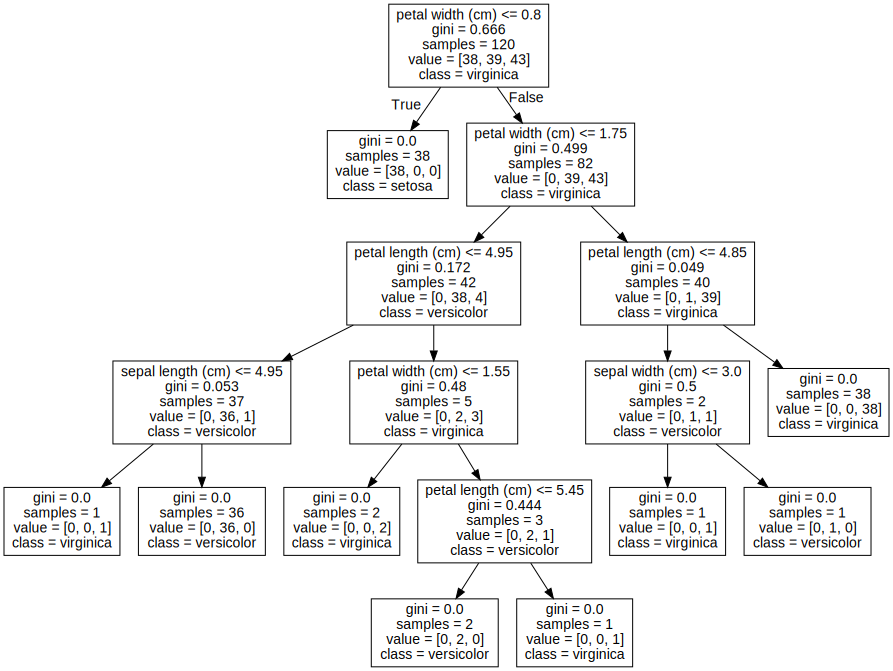

In [106]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [107]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn. neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df["label"] = cancer.target
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [108]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    train_size=0.8, random_state=100000)

In [109]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [110]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot"  , feature_names=data_df.columns[:30])

In [111]:
dt_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.01499053,
       0.        , 0.00624605, 0.03372869, 0.00305658, 0.        ,
       0.00911904, 0.        , 0.00419143, 0.        , 0.        ,
       0.        , 0.00878351, 0.00468454, 0.        , 0.        ,
       0.69733395, 0.10574942, 0.        , 0.0103509 , 0.00917161,
       0.        , 0.        , 0.09259374, 0.        , 0.        ])

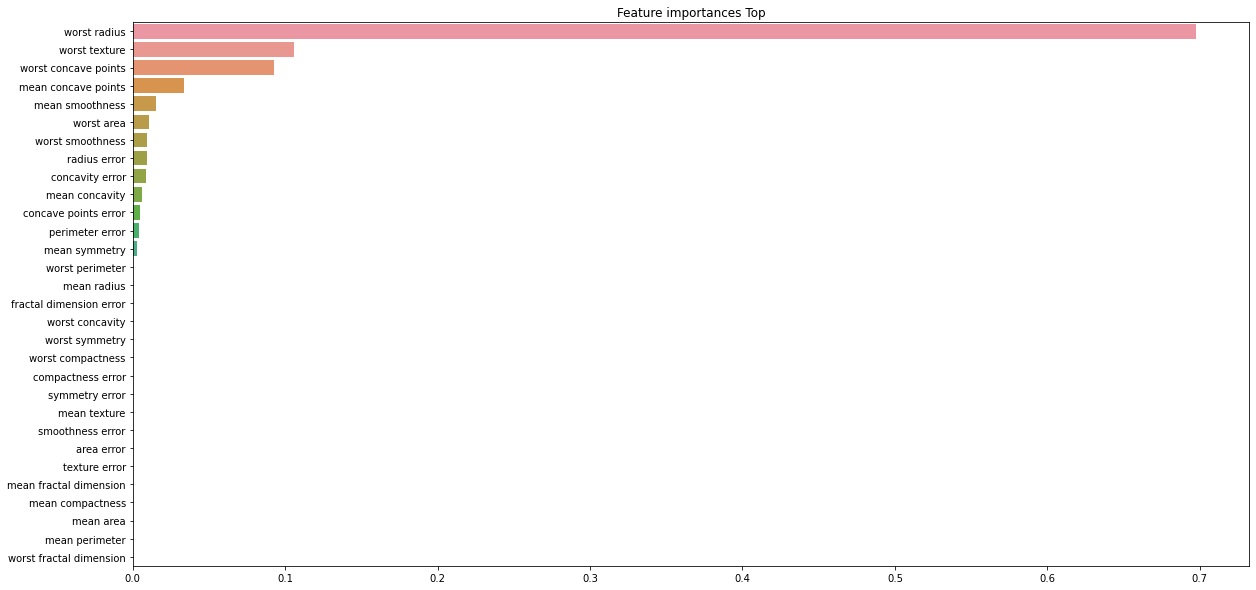

In [115]:
# 디시전트리 피처 중요도 확인 가지치기 전
import matplotlib.pyplot as plt
import seaborn as sns
dt_clf_importances_values = dt_clf.feature_importances_
dt_clf_importances = pd.Series(dt_clf_importances_values, index=data_df.columns[:30])
dt_clf_top = dt_clf_importances.sort_values(ascending=False)

plt.figure(figsize=(20,10))
plt.title('Feature importances Top')
sns.barplot(x=dt_clf_top, y=dt_clf_top.index)
plt.show()

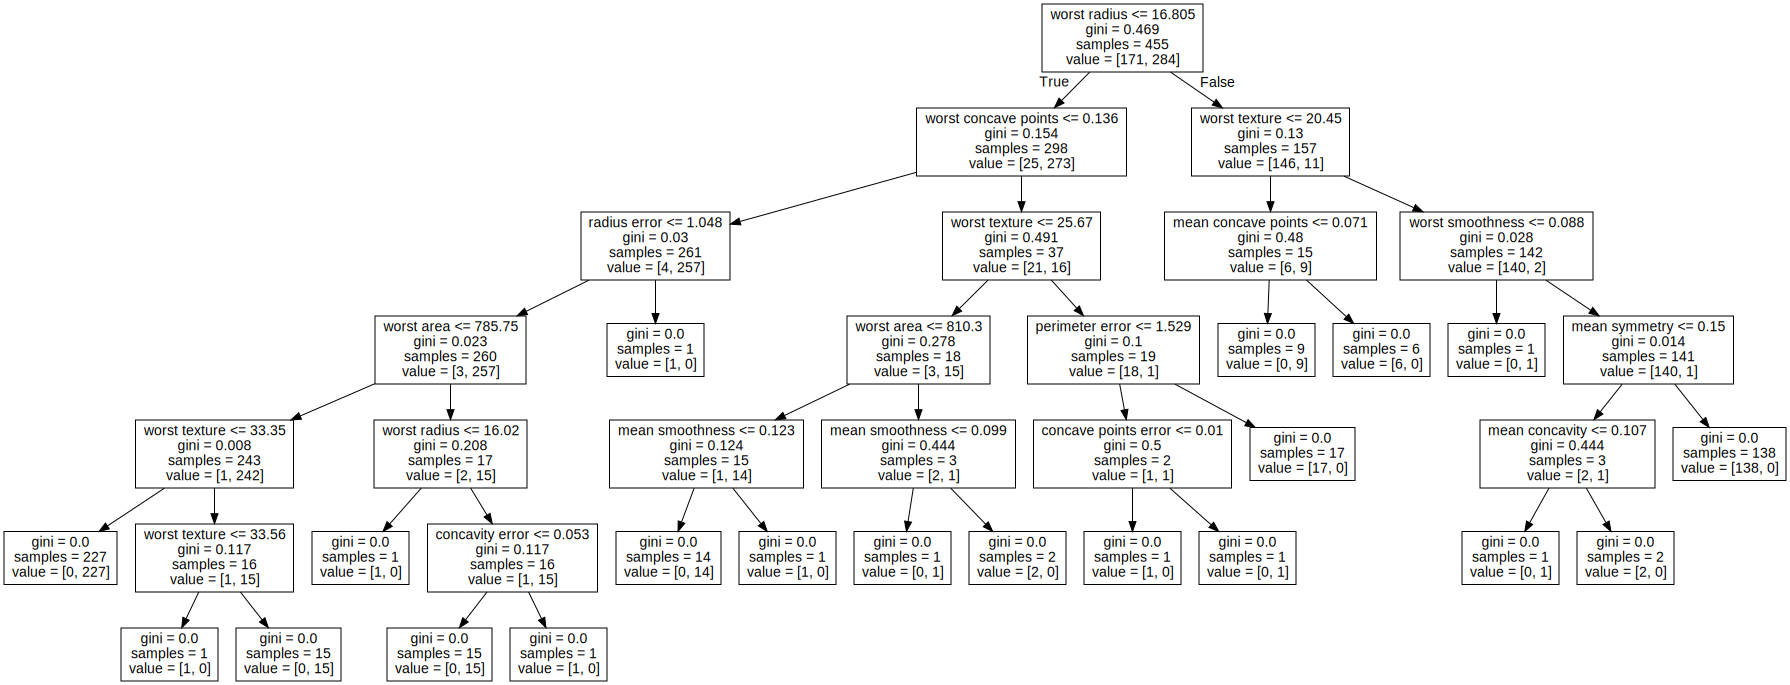

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
# dt_clf_best = DecisionTreeClassifier(random_state=52,criterion = 'entropy', max_depth = values[1],max_features=values[2], min_samples_leaf=values[3], min_samples_split=values[4])


In [116]:
dt_clf_best = DecisionTreeClassifier(random_state=52,criterion = 'entropy')

In [117]:
dt_clf_best.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=52)

In [118]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf_best, out_file="tree.dot"  , feature_names=data_df.columns[:30])

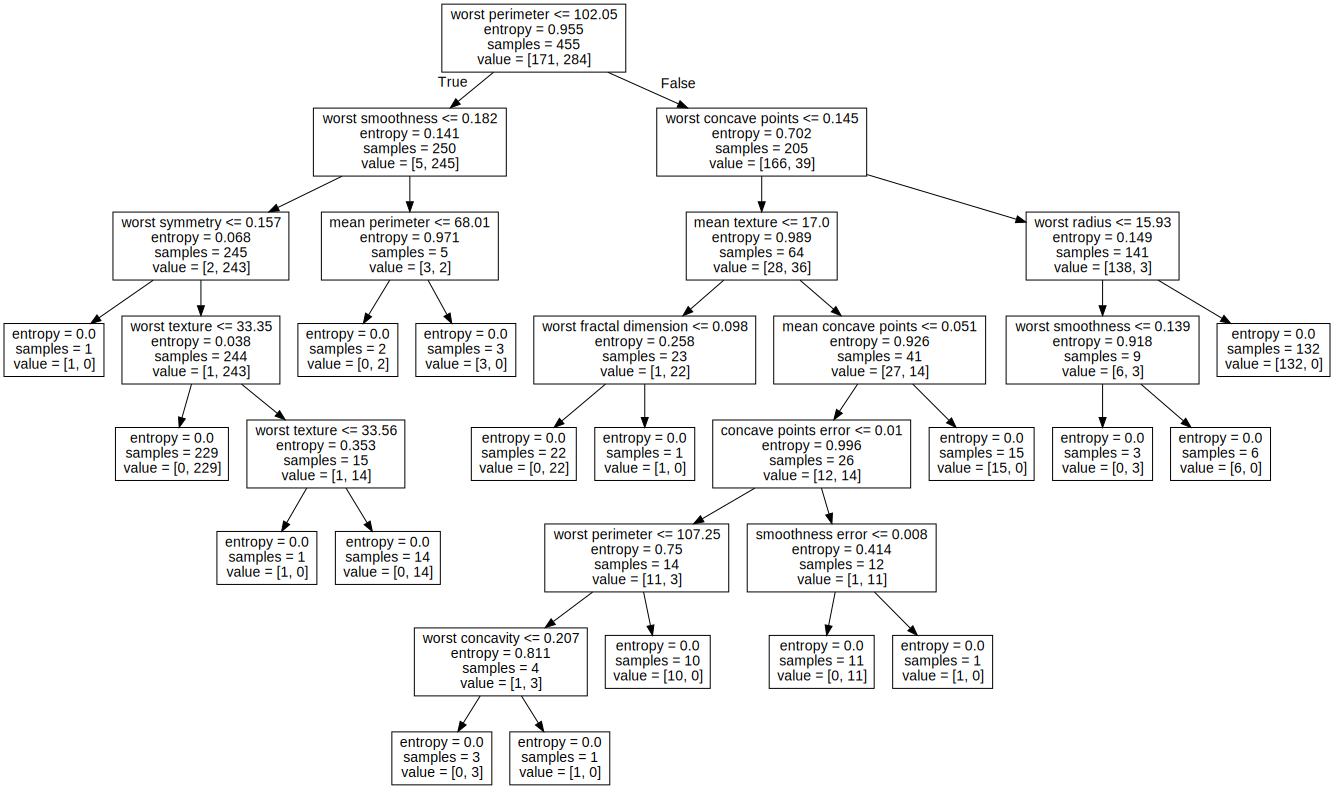

In [119]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

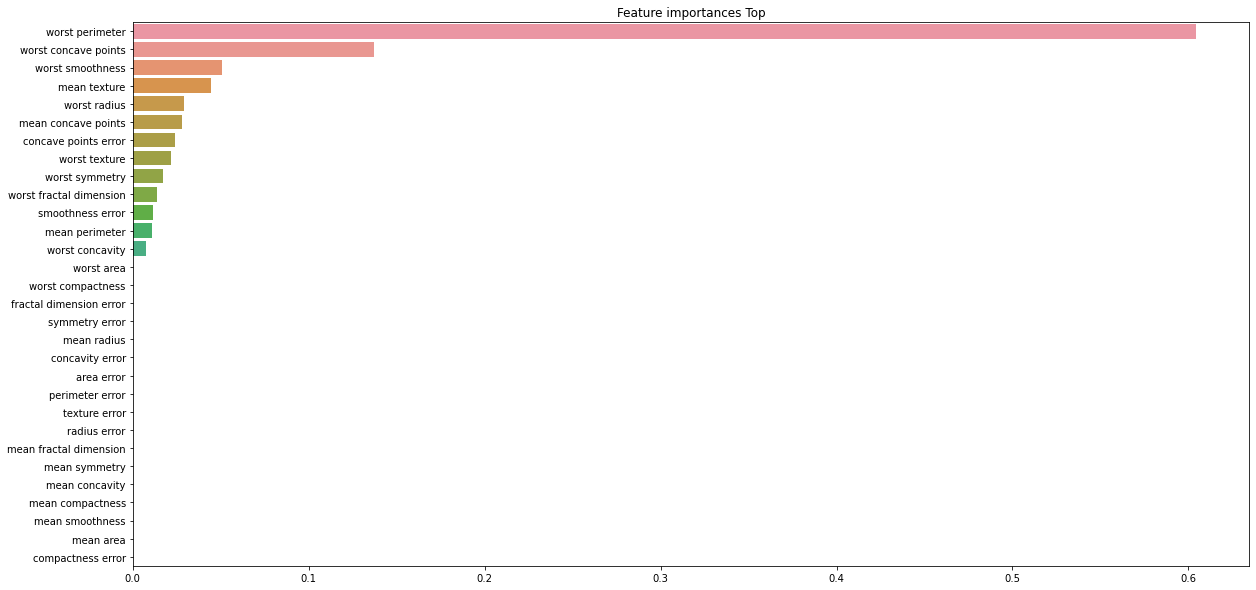

In [120]:
# 디시전트리 피처 중요도 확인 가지치기 전
import matplotlib.pyplot as plt
import seaborn as sns
dt_clf_best_importances_values = dt_clf_best.feature_importances_
dt_clf_best_importances = pd.Series(dt_clf_best_importances_values, index=data_df.columns[:30])
dt_clf_best_top = dt_clf_best_importances.sort_values(ascending=False)

plt.figure(figsize=(20,10))
plt.title('Feature importances Top')
sns.barplot(x=dt_clf_best_top, y=dt_clf_best_top.index)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dt_clf = DecisionTreeClassifier(random_state=52)
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(random_state=52)

# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'criterion': ['entropy', 'gini'],
            'max_depth': [2,4,6,8],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [4,6,8,10],
            'min_samples_split': [4,6,8,10]}
grid_search = GridSearchCV(tree
                        , param_grid = param_grid
                        , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                        , n_jobs = -1)  #-1: 모든 코어 사용
grid_search.fit(X_train, y_train)

# 최선의 결과 출력
print(' 최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

grid_search.best_params_

 최적 하이퍼 파라미터 :{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 4}, 최적 평균 정확도 :0.934


C:\Users\tlsdm\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 4}

In [ ]:
dt_clf_best = DecisionTreeClassifier(random_state=52,criterion = 'gini', max_depth = 6,max_features='auto', 
                                     min_samples_leaf=10, min_samples_split=4)
dt_clf_best.fit(X_train,y_train)

C:\Users\tlsdm\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_depth=6, max_features='auto', min_samples_leaf=10,
                       min_samples_split=4, random_state=52)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf_best, out_file="tree.dot"  , feature_names=data_df.columns[:30])

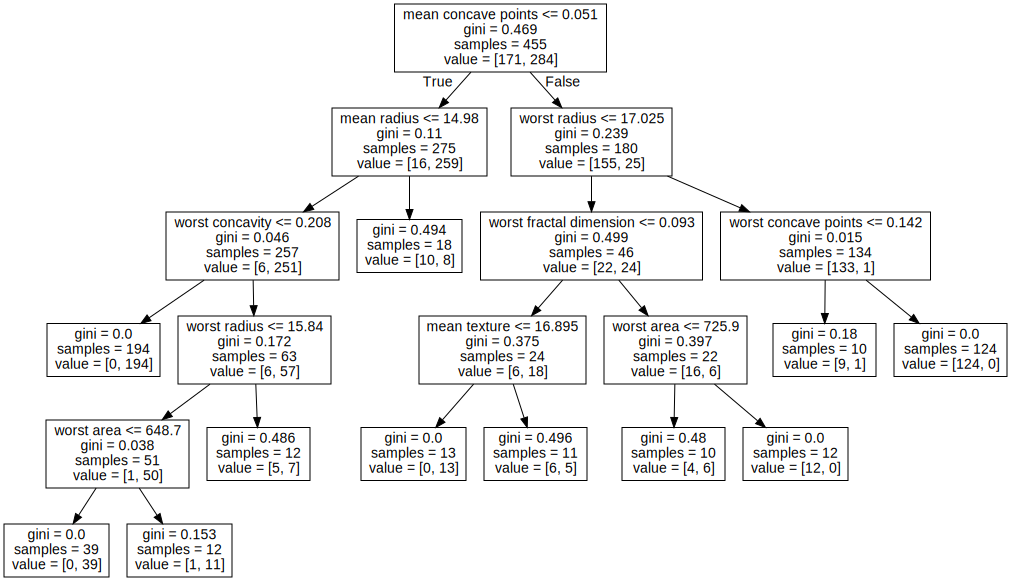

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [136]:
# 랜덤 포레스트 
from random import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_clf = RandomForestClassifier(random_state=0)

In [137]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

In [ ]:
# Bagging - 랜덤포레스트
#### n_estimators : 결정트리 지정
#### max_features 결정트리에 사용된 max_features

https://blog.ex-em.com/1772
# Bagging - 랜덤포레스트

#### n_estimators : 결정트리 지정
#### max_features 결정트리에 사용된 max_features

In [145]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.9736842105263158


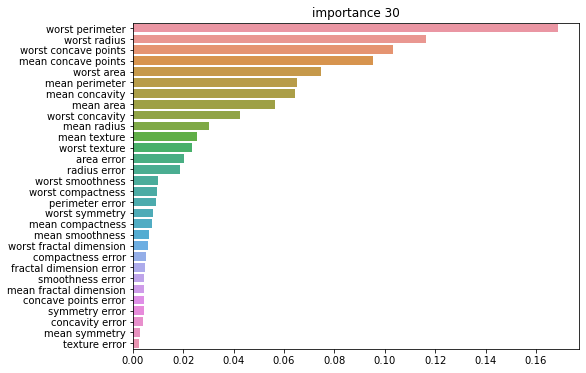

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = data_df.columns[:30])
ftr_top20 = ftr_importances.sort_values(ascending=False)[:30]

plt.figure(figsize=(8,6))
plt.title('importance 30')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMax

https://blog.naver.com/PostView.naver?blogId=hajuny2903&logNo=222422472569&redirect=Dlog&widgetTypeCall=true&directAccess=false

# proba

In [138]:
pred_proba = rf_clf.predict_proba(X_test)
pred_proba

array([[0.  , 1.  ],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.14, 0.86],
       [0.95, 0.05],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.15, 0.85],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.01, 0.99],
       [0.63, 0.37],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.58, 0.42],
       [0.  , 1.  ],
       [0.05, 0.95],
       [0.02, 0.98],
       [0.06, 0.94],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.12, 0.88],
       [0.88, 0.12],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.02, 0.98],
       [0.09, 0.91],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.66, 0.34],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.02, 0.98],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.8 , 0.2 ],
       [1.  , 0.  ],
       [0.  ,

In [139]:
pred_proba[:3]

array([[0.  , 1.  ],
       [0.02, 0.98],
       [0.01, 0.99]])

In [140]:

pred = rf_clf.predict(X_test)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0])

In [144]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n', pred_proba_result[:20])

두개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.   1.   1.  ]
 [0.02 0.98 1.  ]
 [0.01 0.99 1.  ]
 [0.14 0.86 1.  ]
 [0.95 0.05 0.  ]
 [0.05 0.95 1.  ]
 [0.   1.   1.  ]
 [0.   1.   1.  ]
 [0.03 0.97 1.  ]
 [0.15 0.85 1.  ]
 [1.   0.   0.  ]
 [0.97 0.03 0.  ]
 [0.01 0.99 1.  ]
 [0.63 0.37 0.  ]
 [0.   1.   1.  ]
 [0.   1.   1.  ]
 [0.01 0.99 1.  ]
 [0.58 0.42 0.  ]
 [0.   1.   1.  ]
 [0.05 0.95 1.  ]]
